<a href="https://colab.research.google.com/github/hizafioramahardika/PCVK_Genap_2021/blob/main/Week12ML_Hiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hiza Fiora Mahardika

# Labwork 1

Installation and Import Library

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (17.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

In [2]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

Preprocessing Images with OpenCV

In [3]:
IMG_DIR = 'KTMMandiri.jpeg'

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Next, perform pre-processing, and after applying the following code for preprocessing, a new image result will be obtained.

In [7]:
import cv2

def get_grayscale(image):
    # Placeholder logic to convert image to grayscale
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def thresholding(image):
    # Placeholder logic for thresholding
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return thresh

def opening(image):
    # Placeholder logic for opening operation
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def canny(image):
    # Placeholder logic for Canny edge detection
    return cv2.Canny(image, 50, 150)

# Example usage
image = cv2.imread('KTMMandiri.jpeg')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

images = {'gray': gray, 'thresh': thresh, 'opening': opening, 'canny': canny}


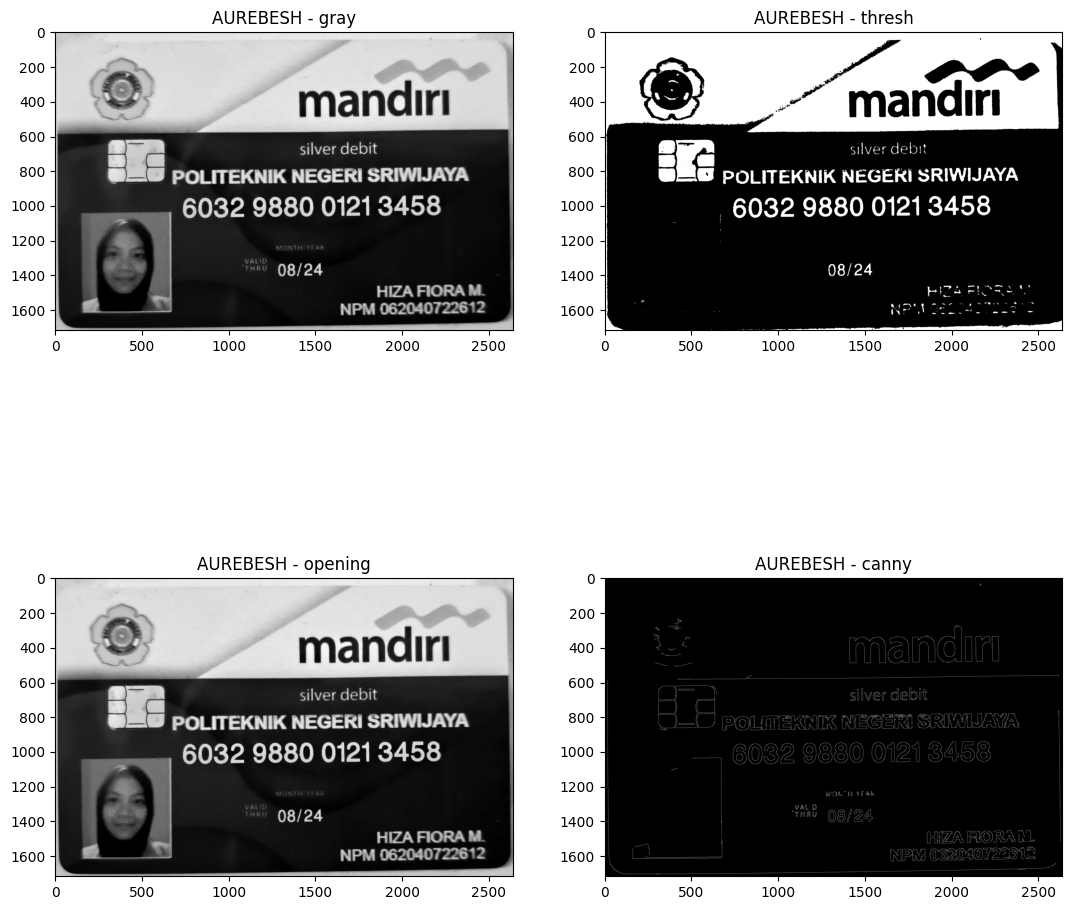

In [8]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

Next, we will extract data from those images using OCR techniques through the following code.

In [9]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GS Of |
©
= mandir
4 4 silver debit )
ema cen ee
- 6032 9880 0121 3458
SU TPZ.
a Pé Ue OS
Se Beate res


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GS Of |
©
= mandir
4 4 silver debit )
ema cen ee
- 6032 9880 0121 3458
SU TPZ.
a Pé Ue OS
Se Beate res


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GS Of |
©
= mandir
4 4 silver debit )
ema cen ee
- 6032 9880 0121 3458
SU TPZ.
a Pé Ue OS
Se Beate res


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-----------------------------------------
GS Of |
©
= mandir
4 4 silver debit )
ema cen ee
- 6032 9880 0121 3458
SU TPZ.
a Pé Ue OS
Se Beate res



# Labwork 2

Bounding Box - Character Level

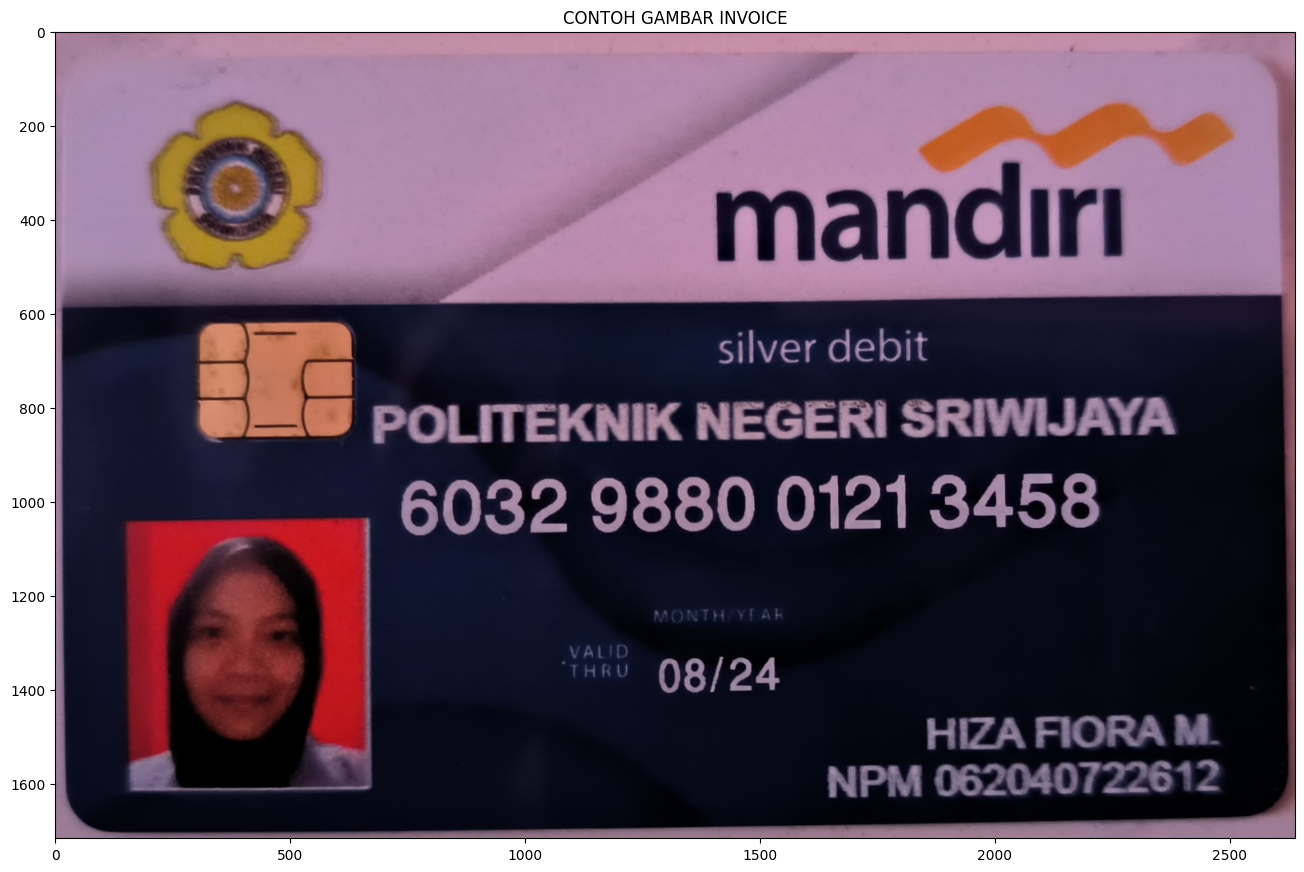

In [16]:
import cv2
import matplotlib.pyplot as plt

# Define the image directory and filename
IMG_DIR = ''
filename = 'KTMMandiri.jpeg'

# Read the image from the directory
image = cv2.imread(IMG_DIR + filename)

# Check if the image is loaded successfully
if image is None:
    print("Error: Unable to load the image.")
else:
    # Separate color channels and display the image
    b, g, r = cv2.split(image)
    rgb_img = cv2.merge([r, g, b])

    # Display the image with a specified size
    plt.figure(figsize=(16, 12))
    plt.imshow(rgb_img)
    plt.title('CONTOH GAMBAR INVOICE')
    plt.show()


The next step is to plot character boxes on the image using the pytesseract.image_to_boxes() function.
The following code will provide bounding box results on the invoice image.

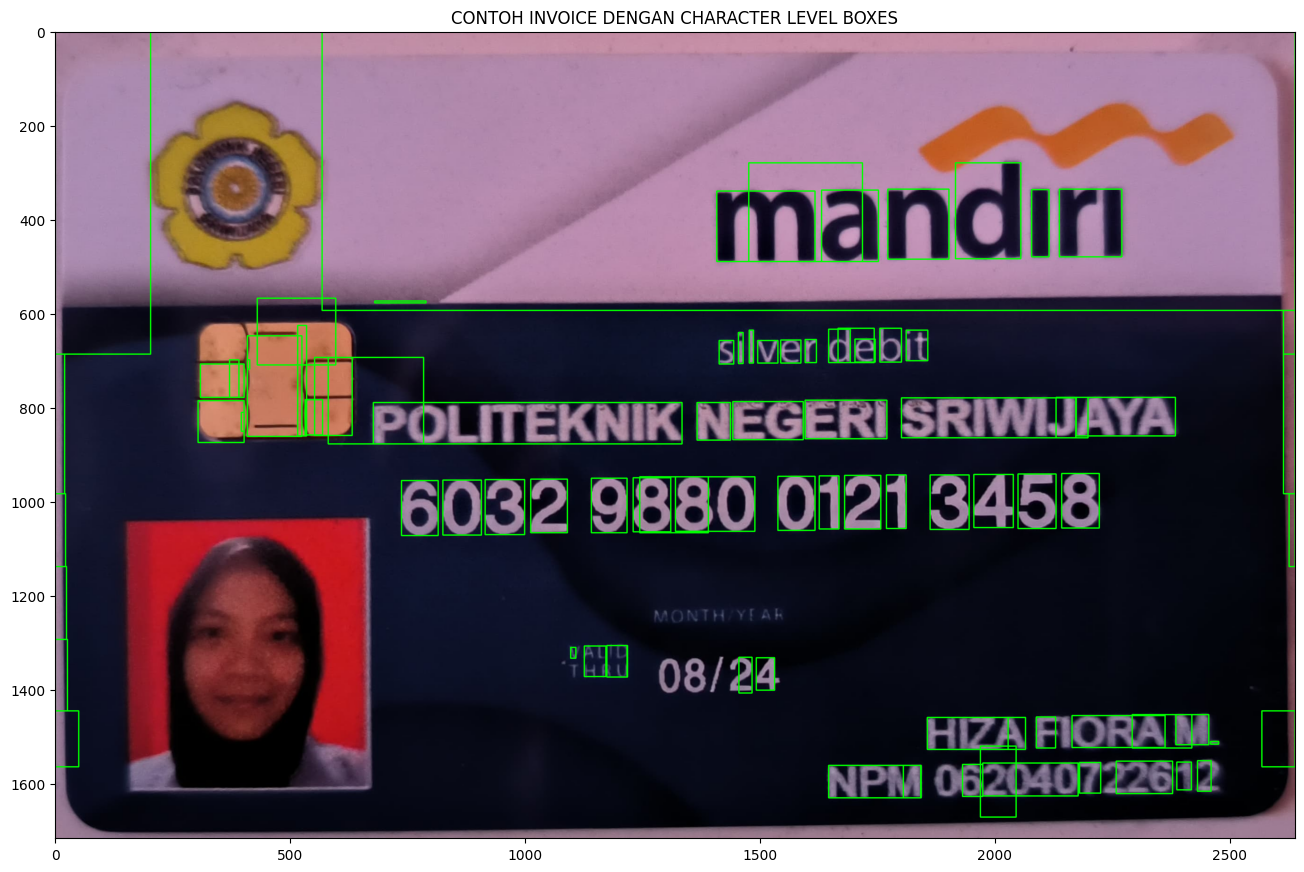

In [17]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'KTMMandiri.jpeg')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()

Bounding Box - Word Level

Next, we will use the example invoice image above to test the output results from Tesseract.
The following code will be used to read the example invoice image and then use the pytesseract.image_to_data() function to obtain text data from the image.

In [18]:
# Membaca gambar contoh invoice
image = cv2.imread(IMG_DIR + 'KTMMandiri.jpeg')

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())


DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Next, in the following code, we use it to filter and only display word boxes that have a confidence level of more than 60%. As a result, the example invoice image will be displayed with boxes marking the location of each word with the qualifying confidence level.

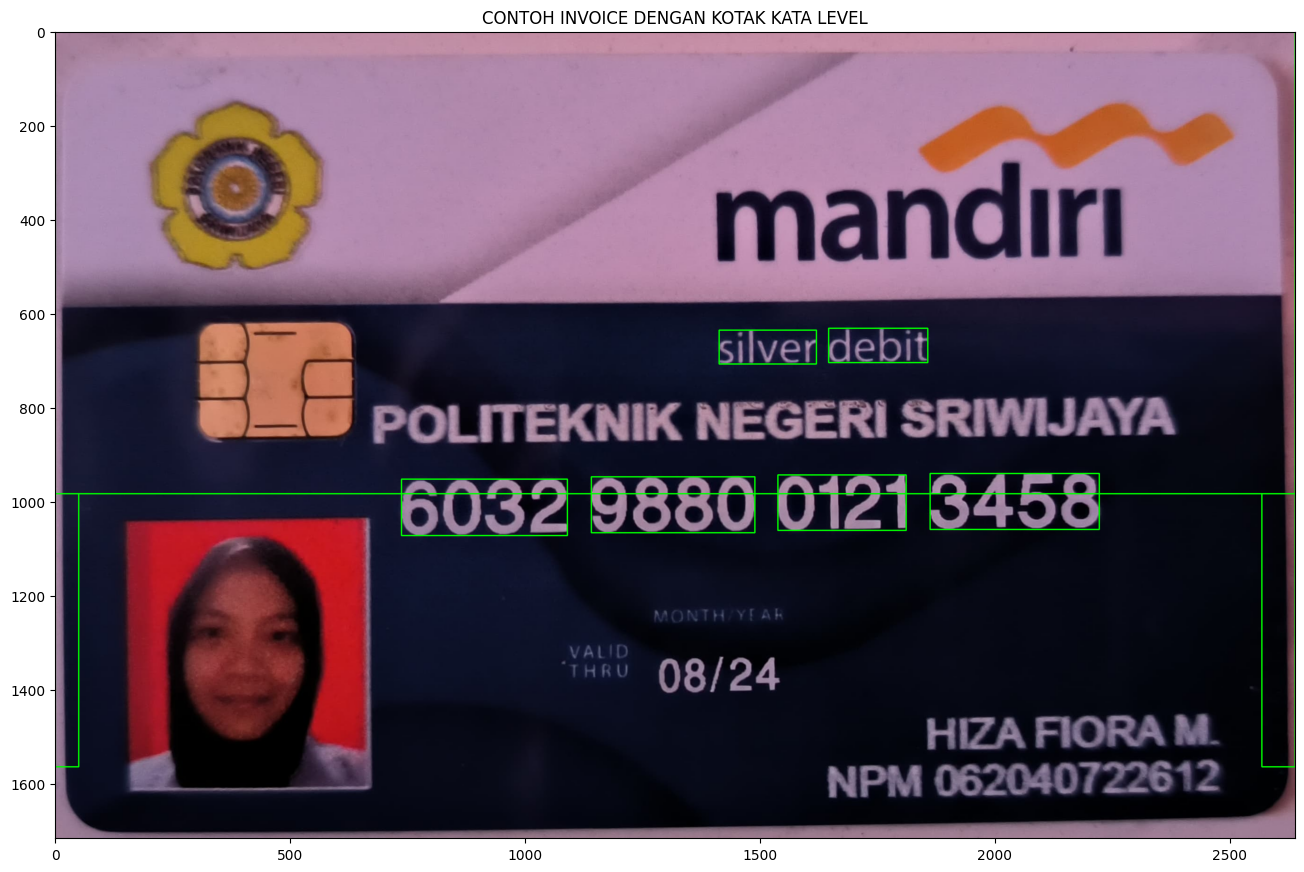

In [19]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()


Text Template Matching - Regex Pattern

Suppose we want to find where a date is located in an image. Here, the template we will use is a regular expression pattern that we will match with our OCR results to find corresponding bounding boxes. We will use the regex module and the image_to_data function for this.

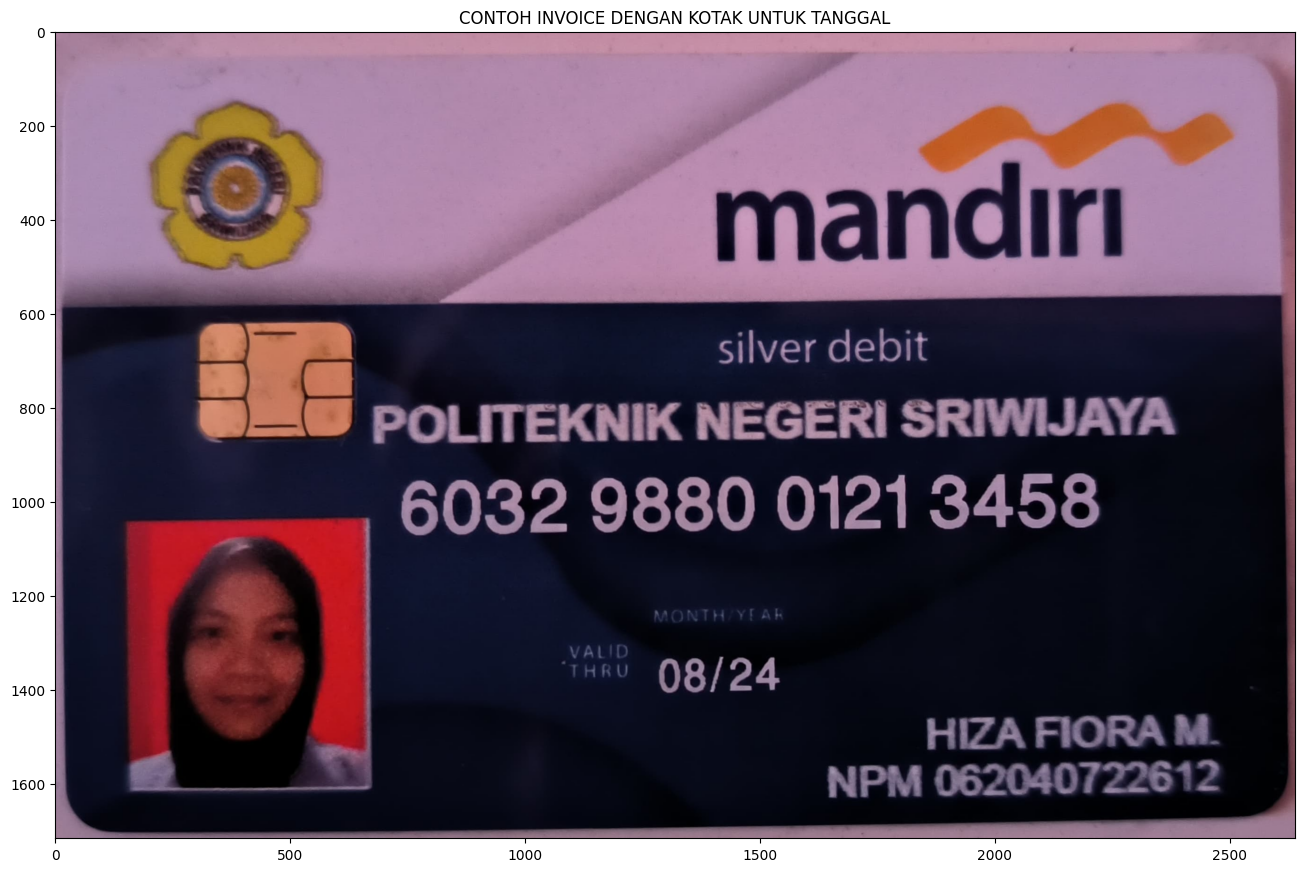

In [20]:
image = cv2.imread(IMG_DIR + 'KTMMandiri.jpeg')

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()

Language Detection - OCR

To set the desired language for your OCR results, use the -l LANG argument in the configuration, whereLANG is the three-letter code for the language you want to use.
The following code is used to read and display an image containing text in multiple languages. The original image is displayed to provide an overview of its content before the OCR process.

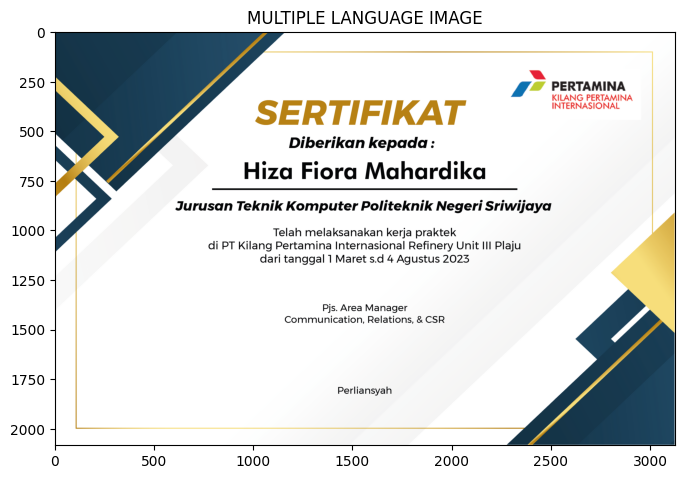

In [21]:
# Membaca gambar asli
image = cv2.imread(IMG_DIR + 'sertifmagangHiza.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

Next, the following code is used to extract text from the image using Tesseract OCR. A custom configuration (custom_config) is applied by specifying only the English language (-l eng). Other parameters such as --oem 3 and --psm 6 are also used to optimize OCR results as needed.

In [22]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))


_
J" PERTAMINA
KILANG PERTAMINA
SERTIFIKAT “NN

Diberikan kepada:

> e e e
Hiza Fiora Mahardika
4 Jurusan Teknik Komputer Politeknik Negeri Sriwijaya
Telah melaksanakan kerja praktek
di PT Kilang Pertamina Internasional Refinery Unit III Plaju
dari tanggal 1 Maret s.d 4 Agustus 2023
Pjs. Area Manager
Communication, Relations, & CSR S
Perliansyah

